**Restaurant Recommendation System (Location-Aware ML)**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [32]:
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

In [33]:
df = pd.read_csv("Dataset .csv")

In [34]:
df.shape

(9551, 21)

In [35]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [36]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [37]:
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [38]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [40]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [41]:
use_df = df[
    [
        "Restaurant Name",
        "City",
        "Latitude",
        "Longitude",
        "Cuisines",
        "Average Cost for two",
        "Aggregate rating",
        "Votes"
    ]
].copy()

In [42]:
use_df.head()

,Restaurant Name,City,Latitude,Longitude,Cuisines,Average Cost for two,Aggregate rating,Votes
0,Le Petit Souffle,Makati City,14.565443,121.027535,"French, Japanese, Desserts",1100,4.8,314
1,Izakaya Kikufuji,Makati City,14.553708,121.014101,Japanese,1200,4.5,591
2,Heat - Edsa Shangri-La,Mandaluyong City,14.581404,121.056831,"Seafood, Asian, Filipino, Indian",4000,4.4,270
3,Ooma,Mandaluyong City,14.585318,121.056475,"Japanese, Sushi",1500,4.9,365
4,Sambo Kojin,Mandaluyong City,14.584450,121.057508,"Japanese, Korean",1500,4.8,229


In [43]:
use_df.dropna(inplace=True)

In [44]:
use_df = use_df[use_df["Aggregate rating"] > 0]

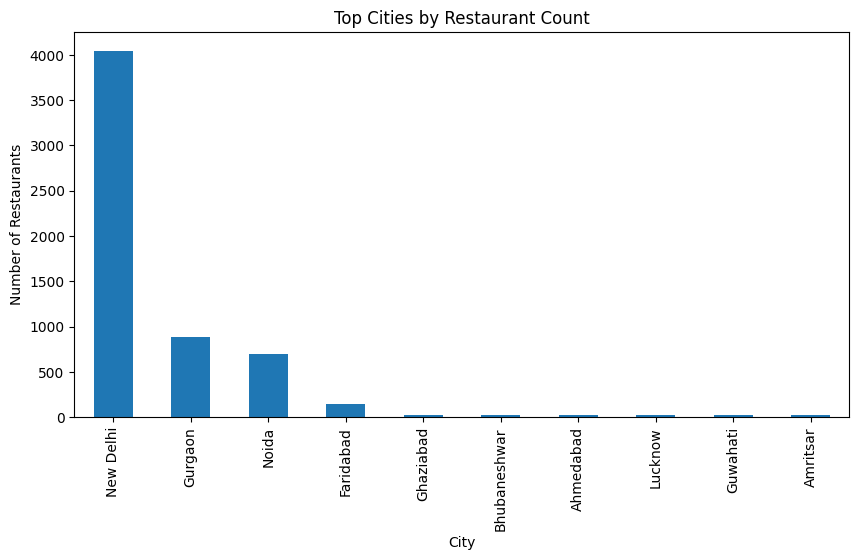

In [45]:
#Top Cities with Restaurants
plt.figure(figsize=(10,5))
use_df["City"].value_counts().head(10).plot(kind="bar")
plt.title("Top Cities by Restaurant Count")
plt.ylabel("Number of Restaurants")
plt.show()


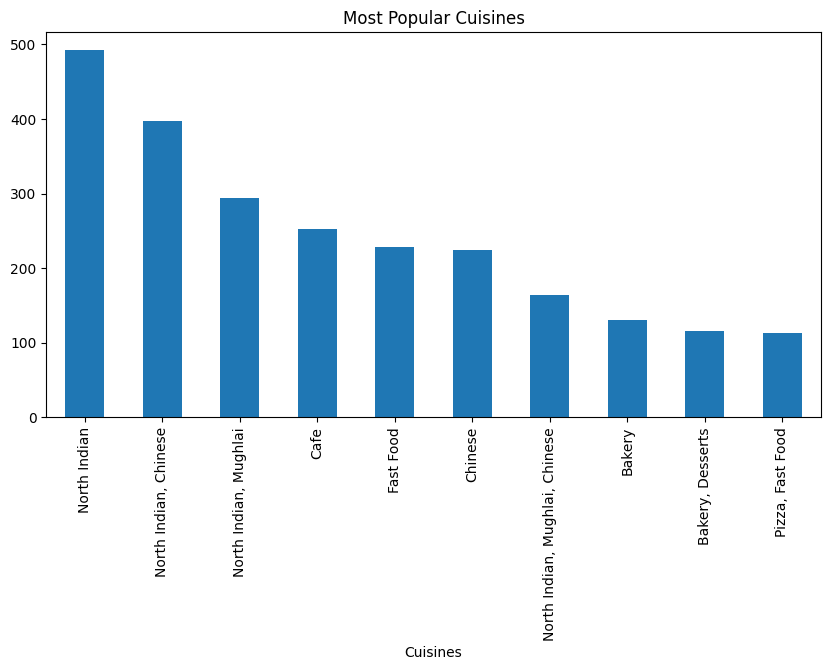

In [46]:
#Most Common Cuisines
plt.figure(figsize=(10,5))
use_df["Cuisines"].value_counts().head(10).plot(kind="bar")
plt.title("Most Popular Cuisines")
plt.show()


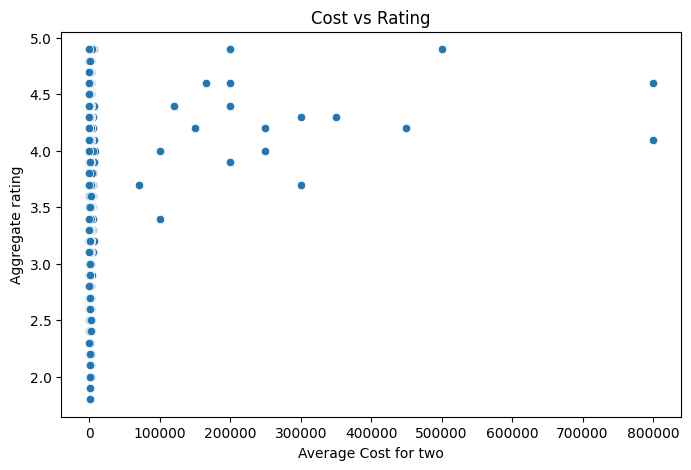

In [47]:
#Cost vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=use_df,
    x="Average Cost for two",
    y="Aggregate rating"
)
plt.title("Cost vs Rating")
plt.show()

In [48]:
#Feature Engineering for KNN
# Encode City & Cuisine
from sklearn.preprocessing import LabelEncoder

city_encoder = LabelEncoder()
cuisine_encoder = LabelEncoder()

use_df["City_enc"] = city_encoder.fit_transform(use_df["City"])
use_df["Cuisine_enc"] = cuisine_encoder.fit_transform(use_df["Cuisines"])

In [49]:
X = use_df[
    [
        "Latitude",
        "Longitude",
        "City_enc",
        "Cuisine_enc",
        "Average Cost for two",
        "Aggregate rating"
    ]
]

In [50]:
#eature Scaling (VERY Important for KNN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
#Train KNN Model (Core Engine)
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(
    n_neighbors=5,
    metric="euclidean"
)

knn.fit(X_scaled)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [52]:
#Recommendation Function (Real User Logic)
def recommend_restaurants(
    city,
    cuisine,
    budget,
    min_rating=3.5
):
    try:
        city_val = city_encoder.transform([city])[0]
        cuisine_val = cuisine_encoder.transform([cuisine])[0]
    except:
        return "City or Cuisine not found in dataset"

    user_vector = pd.DataFrame(
        [[
            use_df["Latitude"].mean(),
            use_df["Longitude"].mean(),
            city_val,
            cuisine_val,
            budget,
            min_rating
        ]],
        columns=X.columns
    )

    user_scaled = scaler.transform(user_vector)
    distances, indices = knn.kneighbors(user_scaled)

    return use_df.iloc[indices[0]][
        [
            "Restaurant Name",
            "City",
            "Cuisines",
            "Average Cost for two",
            "Aggregate rating",
            "Votes"
        ]
    ]

In [55]:
#Take User Input (Simulates App Behavior)
user_city = input("Enter city: ")
user_cuisine = input("Enter cuisine: ")
user_budget = float(input("Enter budget for two: "))

recommend_restaurants(
    city=user_city,
    cuisine=user_cuisine,
    budget=user_budget
)


,Restaurant Name,City,Cuisines,Average Cost for two,Aggregate rating,Votes
3741,Cocoberry,New Delhi,Desserts,300,3.5,66
3674,Fluffles - The Fluffy Waffle Co.,New Delhi,Desserts,300,3.5,27
3354,Mother Dairy Ice Cream,New Delhi,"Desserts, Ice Cream, North Indian",250,3.5,19
6436,hug!,New Delhi,Desserts,300,3.5,19
6665,Bintang Sweet Thrills,New Delhi,"Desserts, Ice Cream",200,3.5,21
